# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
pip install sklearn_rvm

In [ ]:
#Type your code here
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing, klasifikasi, dan evaluasi
from sklearn.model_selection import train_test_split  # Membagi dataset menjadi data latih dan uji
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Preprocessing data (encoding & scaling)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Evaluasi model

# Library RVM
from sklearn_rvm import EMRVC # Relevance Vector Classifier (untuk tugas klasifikasi)
# from sklearn import RVR  # Relevance Vector Regressor (untuk tugas regresi)

# **2. Memuat Dataset**

# **Heart Disease Dataset**

Dataset **Heart Disease** dirancang untuk klasifikasi kemungkinan penyakit jantung pada pasien. Dataset ini memiliki 12 atribut utama, yaitu:

## **Deskripsi Atribut**
1. **age** *(Numeric)*: Usia pasien dalam tahun.
2. **sex** *(Binary)*:  
   - 1 = male  
   - 0 = female
3. **chest pain type** *(Nominal)*:  
   - 1 = typical angina  
   - 2 = atypical angina  
   - 3 = non-anginal pain  
   - 4 = asymptomatic
4. **resting bp s** *(Numeric)*: Tekanan darah saat istirahat dalam mm Hg.
5. **cholesterol** *(Numeric)*: Kadar kolesterol dalam darah dalam mg/dL.
6. **fasting blood sugar** *(Binary)*:  
   - 1 = >120 mg/dL  
   - 0 = ≤120 mg/dL
7. **resting ecg** *(Nominal)*:  
   - 0 = normal  
   - 1 = ST-T wave abnormality  
   - 2 = probable/definite left ventricular hypertrophy
8. **max heart rate** *(Numeric)*: Denyut jantung maksimum yang dicapai.
9. **exercise angina** *(Binary)*:  
   - 1 = ya (angina saat latihan)  
   - 0 = tidak (tidak ada angina saat latihan)
10. **oldpeak** *(Numeric)*: Depresi segmen ST akibat latihan dibandingkan dengan istirahat.
11. **ST slope** *(Nominal)*:  
    - 1 = upsloping  
    - 2 = flat  
    - 3 = downsloping
12. **target** *(Binary)*:  
    - 1 = memiliki penyakit jantung  
    - 0 = normal (tidak memiliki penyakit jantung)

In [ ]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("mexwell/heart-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 399k/399k [00:00<00:00, 22.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mexwell/heart-disease-dataset/versions/2


In [ ]:
# List files in the directory to identify the CSV file
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['heart_statlog_cleveland_hungary_final.csv', 'documentation.pdf']


In [ ]:
csv_file = os.path.join(path, "heart_statlog_cleveland_hungary_final.csv")

# load dataset ke dataframe
df = pd.read_csv(csv_file)

# tampilkan 10 baris pertama
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


# **3. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Tinjau jumlah baris dan kolom dalam dataset
df.shape

(1190, 12)

In [ ]:
# Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
# memeriksa missing value
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


Tidak ada missing value pada data tersebut

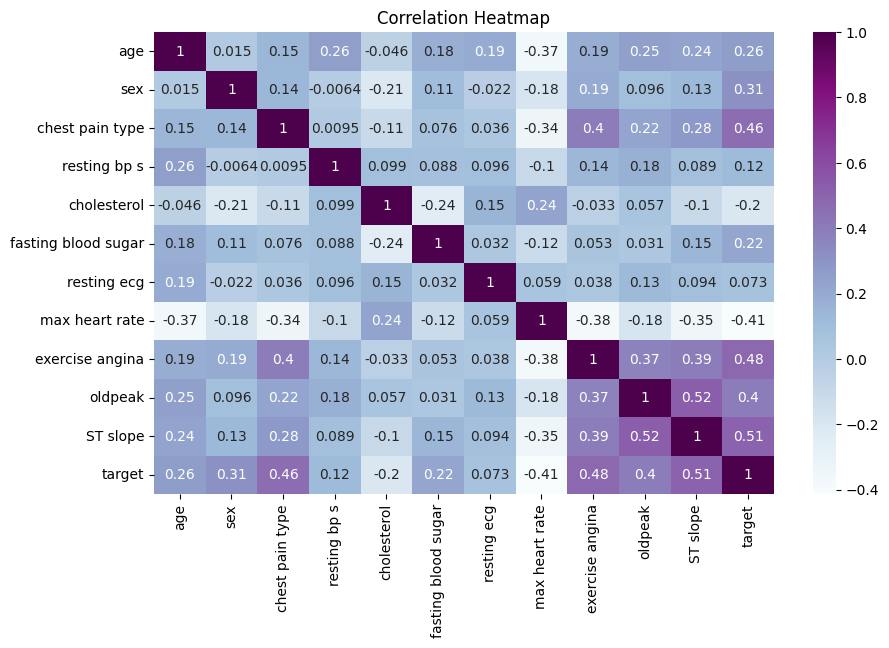

In [ ]:
# buat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.title('Correlation Heatmap')
plt.show()

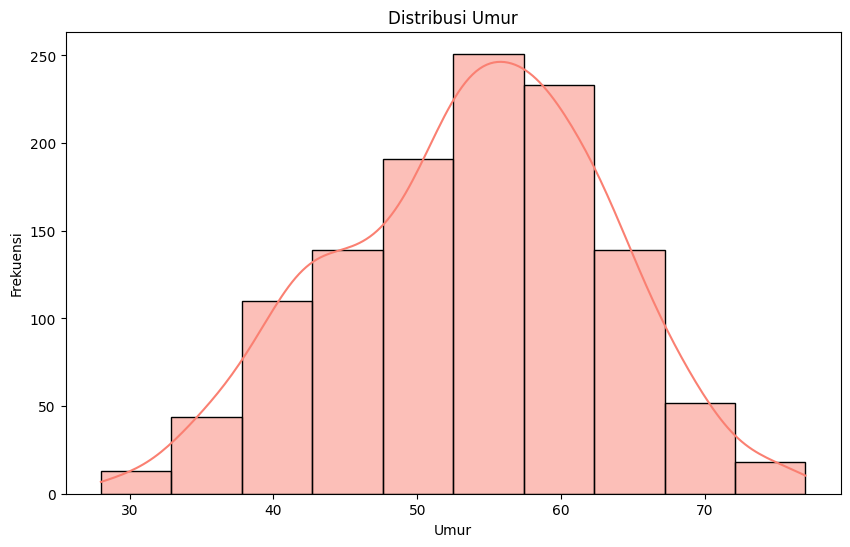

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age',bins=10, kde=True, color='salmon')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

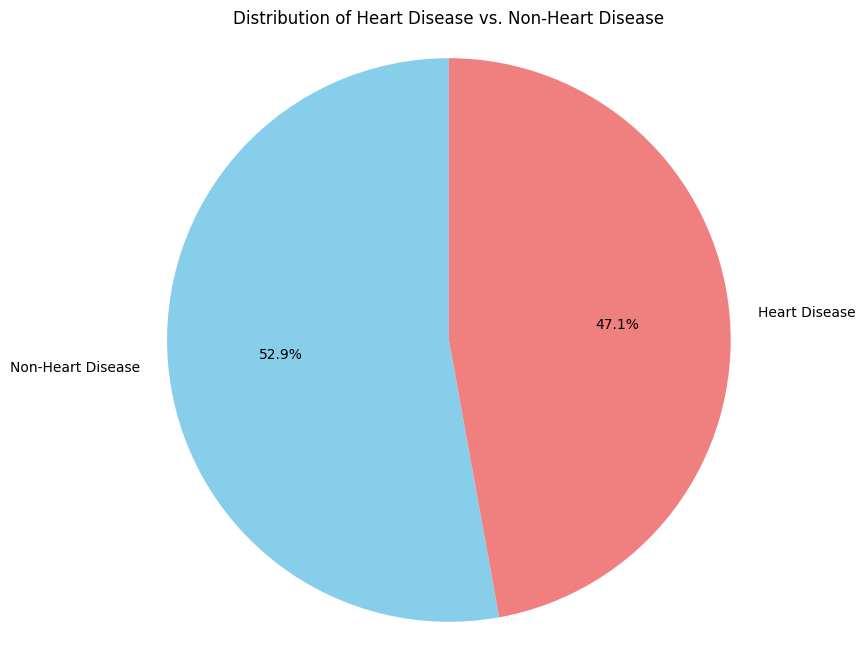

In [ ]:
# Pie chart untuk melihat persebaran orang penyakit jantung dan non-jantung
stroke_percentage = df['target'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(stroke_percentage, labels=['Non-Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease vs. Non-Heart Disease')
plt.axis('equal')
plt.show()

# **4. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Membersihkan spasi pada nama kolom
df.columns = df.columns.str.strip()

In [ ]:
# mengecek data duplikat
duplicates = df.duplicated()

print(f"Jumlah baris duplikat: {duplicates.sum()}")

Jumlah baris duplikat: 272


In [ ]:
# menghapus baris duplikat
df_cleaned = df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {df_cleaned.shape[0]}")

print(f"Jumlah baris duplikat setelah penghapusan: {df_cleaned.duplicated().sum()}")

Jumlah baris setelah menghapus duplikat: 918
Jumlah baris duplikat setelah penghapusan: 0


In [ ]:
# cek nilai null
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Standarisasi untuk kolom age, resting bp s , cholesterol, max heart rate
columns_to_scale = ['age', 'resting bp s', 'cholesterol', 'max heart rate']

# Standarisasi untuk kolom yang dipilih
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Tampilkan hasil
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,1,2,0.427328,0.775674,0,0,1.265039,0,0.0,1,0
1,-0.504600,0,3,1.516587,-0.299512,0,0,0.637758,0,1.0,2,1
2,-1.787437,1,2,-0.117301,0.716489,0,1,-1.636136,0,0.0,1,0
3,-0.611503,0,4,0.318402,0.035867,0,0,-1.244085,1,1.5,2,1
4,0.029915,1,3,0.971958,-0.151550,0,0,-0.695214,0,0.0,1,0


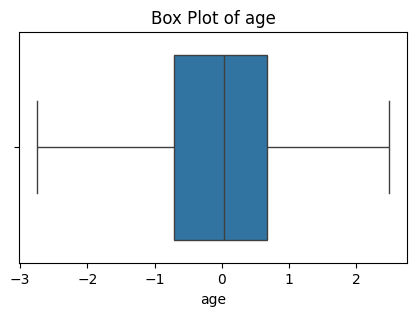

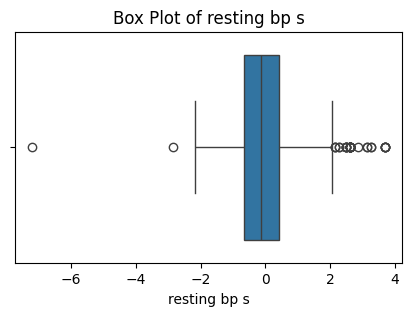

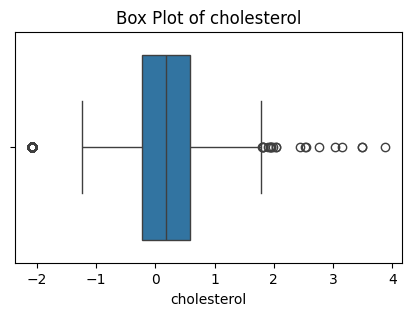

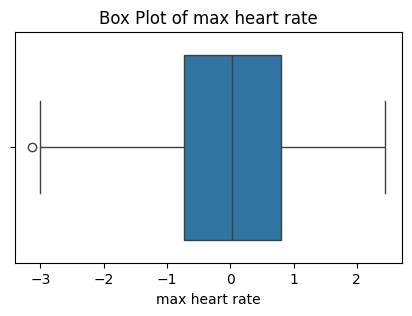

In [ ]:
# standarisasi untuk kolom yang perlu distandarisasi
columns_to_standardize = ['age', 'resting bp s', 'cholesterol', 'max heart rate']

for feature in columns_to_standardize:
    plt.figure(figsize = (5, 3))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

kolom resting bp s dan cholesterol memiliki outlier

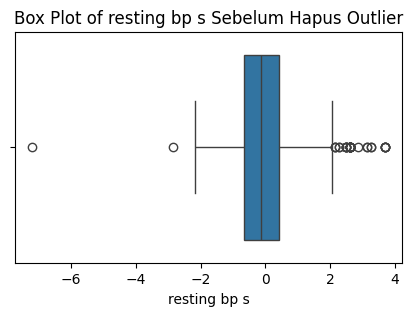

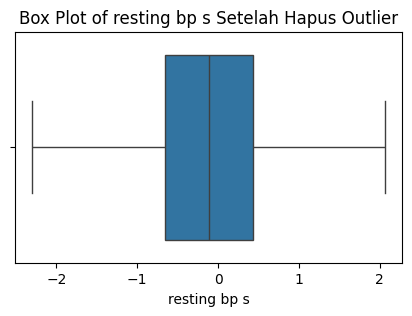

In [ ]:
# menangani outlier pada kolom resting bp s
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['resting bp s'])
plt.title('Box Plot of resting bp s Sebelum Hapus Outlier')
plt.show()

# Mengganti outlier dengan nilai batas terdekat
# Langkah 1: Menghitung Q1, Q3, dan IQR untuk kolom 'resting bp s'
Q1 = df['resting bp s'].quantile(0.25)  # Kuartil pertama (Q1)
Q3 = df['resting bp s'].quantile(0.75)  # Kuartil ketiga (Q3)
IQR = Q3 - Q1  # Interquartile range (IQR)

# Menghitung batas bawah dan batas atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Langkah 2: Mengganti outliers dengan nilai batas terdekat
df['resting bp s'] = df['resting bp s'].apply(lambda x: (Q1 - 1.5 * IQR) if x < lower_bound else (Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['resting bp s'])
plt.title('Box Plot of resting bp s Setelah Hapus Outlier')
plt.show()

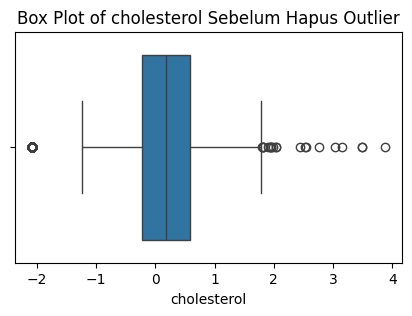

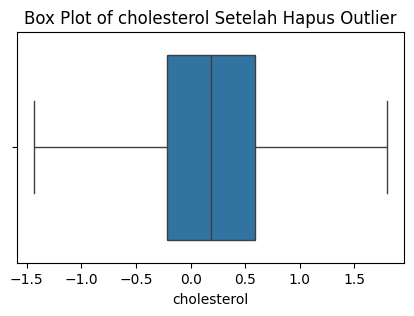

In [ ]:
# menangani outlier pada kolom cholesterol
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['cholesterol'])
plt.title('Box Plot of cholesterol Sebelum Hapus Outlier')
plt.show()

# Mengganti outlier dengan nilai batas terdekat
# Langkah 1: Menghitung Q1, Q3, dan IQR untuk kolom 'cholesterol'
Q1 = df['cholesterol'].quantile(0.25)  # Kuartil pertama (Q1)
Q3 = df['cholesterol'].quantile(0.75)  # Kuartil ketiga (Q3)
IQR = Q3 - Q1  # Interquartile range (IQR)

# Menghitung batas bawah dan batas atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Langkah 2: Mengganti outliers dengan nilai batas terdekat
df['cholesterol'] = df['cholesterol'].apply(lambda x: (Q1 - 1.5 * IQR) if x < lower_bound else (Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['cholesterol'])
plt.title('Box Plot of cholesterol Setelah Hapus Outlier')
plt.show()

# **5. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
#Type your code here
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(952, 11), y_train=(952,)
Test set shape: X_test=(238, 11), y_test=(238,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
#Type your code here
rvm = EMRVC(kernel='linear').fit(X_train, y_train)  # Menggunakan kernel linear

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== rvm Classifier ====
Confusion Matrix:
[[ 88  19]
 [ 18 113]]
True Positive (TP): 113
False Positive (FP): 19
False Negative (FN): 18
True Negative (TN): 88
Accuracy: 0.8445
Precision: 0.8561
Recall: 0.8626
F1-Score: 0.8593

----------------------------------------



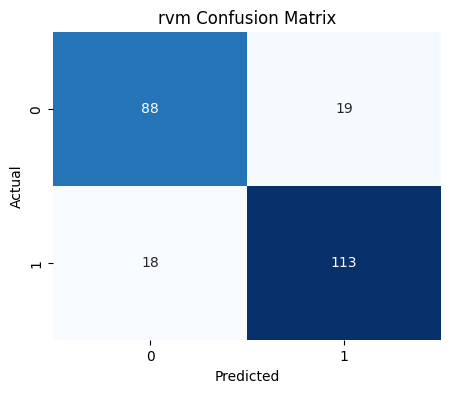

In [ ]:
# RVM
y_pred = rvm.predict(X_test)
cm_rvm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_rvm.ravel()
print("==== rvm Classifier ====")
print("Confusion Matrix:")
print(cm_rvm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rvm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('rvm Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# **5. Testing**


In [ ]:
# buat data baru
new_data = pd.DataFrame({
    'age': [55],
    'sex': [1],
    'chest pain type': [3],
    'resting bp s': [130],
    'cholesterol': [250],
    'fasting blood sugar': [0],
    'resting ecg': [0],
    'max heart rate': [150],
    'exercise angina': [0],
    'oldpeak': [2.3],
    'ST slope': [2]
})

new_data = pd.DataFrame(new_data)
new_data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,55,1,3,130,250,0,0,150,0,2.3,2


In [ ]:
# preprocessing new_data
new_data[columns_to_scale] = scaler.transform(new_data[columns_to_scale])

# buat prediksi
prediction = rvm.predict(new_data)

# tampilkan prediksi
print(f"Diagnosis data baru: {prediction[0]}")

Diagnosis data baru: 1
